# Data Exploration

## 1. Installing necessary Libraries

In [2]:
%pip install datasets matplotlib seaborn pandas tokenizers jax

  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/e1/b1/80a59608b0c6030d63aad16390aeddec531a75971dc16ac9cd422defd64b/datasets-4.1.0-py3-none-any.whl.metadata
  Using cached datasets-4.1.0-py3-none-any.whl.metadata (18 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/45/c3/994ef20eb4154ab84cc08d033834555319e4af970165e6c8894050af0b3c/matplotlib-3.10.6-cp312-cp312-win_amd64.whl.metadata
  Using cached matplotlib-3.10.6-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/28/30/8114832daff7489f179971dbc1d854109b7f4365a546e3ea75b6516cea95/pandas-2.3.2-cp312-cp


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Imports

In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import pandas as pd
from tokenizers import Tokenizer

# Seaborn Configuration
sns.set_style("whitegrid")
# Matplotlib Configuration
plt.rcParams['figure.figsize'] = (12, 6)

c:\Users\aattr\OneDrive\Documents\Structa\scaling-llms\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 3. Loading the Dataset

In [4]:
dataset = load_dataset(
    "codeparrot/codeparrot-clean",
    split="train",
    streaming=True
    )

sample_size = 150000

df = pd.DataFrame(dataset.take(sample_size))

print(f"Length of Samples = {len(df)}")
df.head()

c:\Users\aattr\OneDrive\Documents\Structa\scaling-llms\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\aattr\.cache\huggingface\hub\datasets--codeparrot--codeparrot-clean. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Length of Samples = 150000


repo_name  \
0  ahmedbodi/AutobahnPython   
1            ifduyue/django   
2        kmike/scikit-learn   
3        houlixin/BBB-TISDK   
4            dataxu/ansible   

                                                path copies   size  \
0  examples/asyncio/websocket/echo/client_corouti...     13   2044   
1                     django/core/checks/registry.py     13   3108   
2                          sklearn/utils/__init__.py      3  10094   
3  linux-devkit/sysroots/i686-arago-linux/usr/lib...    593  13942   
4     lib/ansible/modules/system/kernel_blacklist.py    125   4009   

                                             content       license  \
0  ##############################################...    apache-2.0   
1  from itertools import chain\n\nfrom django.uti...  bsd-3-clause   
2  """\nThe :mod:`sklearn.utils` module includes ...  bsd-3-clause   
3  """ Python Character Mapping Codec cp1250 gene...       gpl-2.0   
4  #!/usr/bin/python\n# encoding: utf-8 -*-\n\n# ...       gpl-3.0   

                  hash  line_mean  line_max  alpha_frac  autogenerated  
0  7822061744094950801  31.444444        79    0.623288          False  
1 -2035686896372967697  30.714286        91    0.602317          False  
2  2334709577611160651  26.883978        79    0.568060          False  
3 -6356832018515182181  44.413681       119    0.550351          False  
4  8498771084445726761  24.864516        92    0.575206          False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   repo_name      150000 non-null  object 
 1   path           150000 non-null  object 
 2   copies         150000 non-null  object 
 3   size           150000 non-null  object 
 4   content        150000 non-null  object 
 5   license        150000 non-null  object 
 6   hash           150000 non-null  int64  
 7   line_mean      150000 non-null  float64
 8   line_max       150000 non-null  int64  
 9   alpha_frac     150000 non-null  float64
 10  autogenerated  150000 non-null  bool   
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 11.6+ MB


In [ ]:
df['content'].iloc[0]

'###############################################################################\n##\n##  Copyright (C) 2013-2014 Tavendo GmbH\n##\n##  Licensed under the Apache License, Version 2.0 (the "License");\n##  you may not use this file except in compliance with the License.\n##  You may obtain a copy of the License at\n##\n##      http://www.apache.org/licenses/LICENSE-2.0\n##\n##  Unless required by applicable law or agreed to in writing, software\n##  distributed under the License is distributed on an "AS IS" BASIS,\n##  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.\n##  See the License for the specific language governing permissions and\n##  limitations under the License.\n##\n###############################################################################\n\nfrom autobahn.asyncio.websocket import WebSocketClientProtocol, \\\n                                       WebSocketClientFactory\n\nimport asyncio\n\n\n\nclass MyClientProtocol(WebSocketClientProtocol):\n\

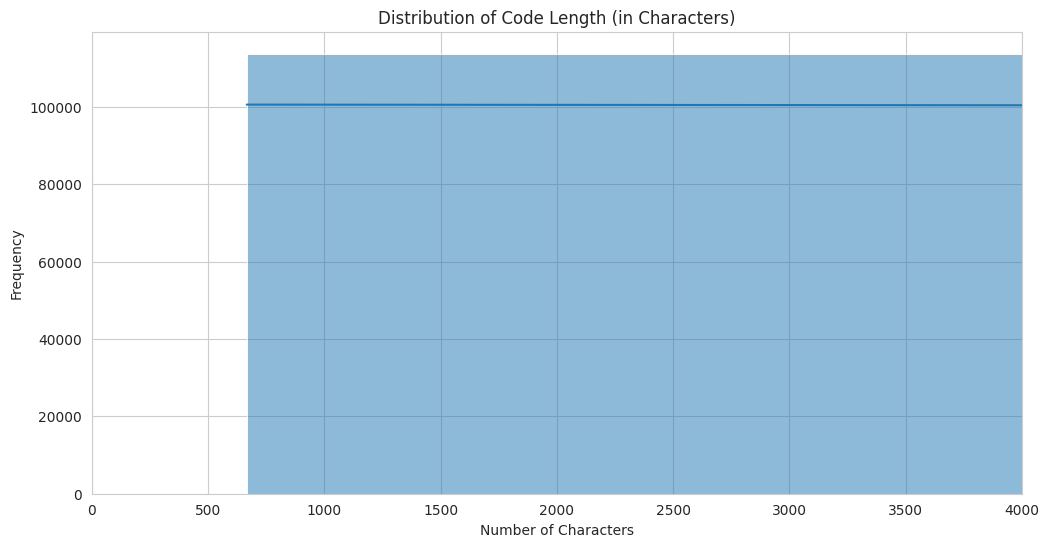

count    1.500000e+05
mean     1.029532e+04
std      2.217679e+04
min      6.660000e+02
25%      2.282000e+03
50%      4.606000e+03
75%      1.032400e+04
max      1.000643e+06
Name: code_length_chars, dtype: float64


In [ ]:
df['code_length_chars'] = df['content'].str.len()

# Plot the distribution
plt.figure()
sns.histplot(df['code_length_chars'], bins=100, kde=True)
plt.title('Distribution of Code Length (in Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.xlim(0, 4000) # Limit x-axis for better readability
plt.show()

# Get descriptive statistics
print(df['code_length_chars'].describe())

There seems to be a problem here...
Most of our code samples are less than 4000 codes, therefore to help resolve this

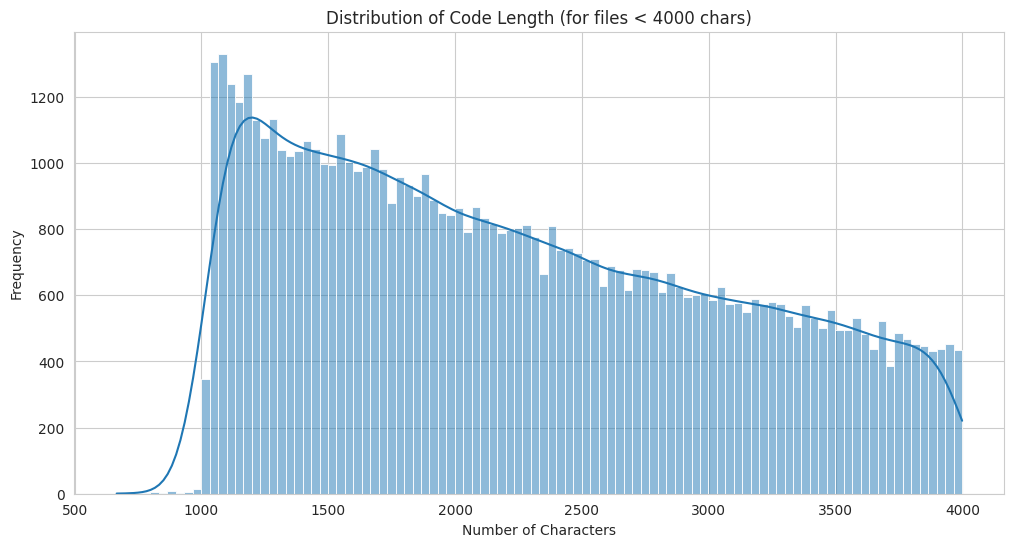

Descriptive statistics for the ORIGINAL, UNFILTERED data:
count    1.500000e+05
mean     1.029532e+04
std      2.217679e+04
min      6.660000e+02
25%      2.282000e+03
50%      4.606000e+03
75%      1.032400e+04
max      1.000643e+06
Name: code_length_chars, dtype: float64


In [ ]:
df_filtered = df[df['code_length_chars'] < 4000]

plt.figure(figsize=(12, 6))

sns.histplot(data=df_filtered, x='code_length_chars', bins=100, kde=True)


plt.title('Distribution of Code Length (for files < 4000 chars)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

plt.show()


print("Descriptive statistics for the ORIGINAL, UNFILTERED data:")
print(df['code_length_chars'].describe())

Now let's add some more important metrics on this graph

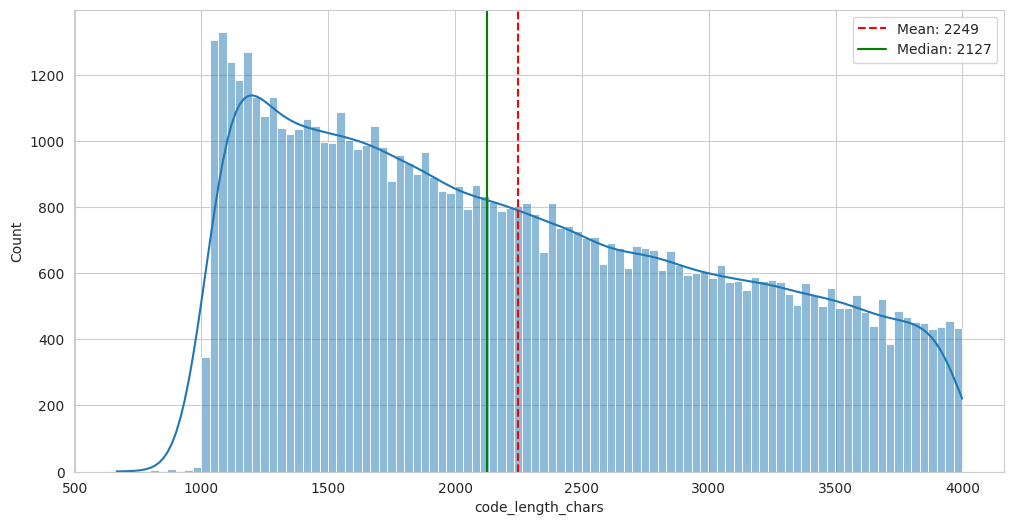

In [ ]:
# --- Code to add vertical lines ---

# Calculate mean and median from the filtered data
mean_len = df_filtered['code_length_chars'].mean()
median_len = df_filtered['code_length_chars'].median()

# ... your plotting code ...
sns.histplot(data=df_filtered, x='code_length_chars', bins=100, kde=True)

# Add vertical lines for mean and median
plt.axvline(mean_len, color='r', linestyle='--', label=f'Mean: {mean_len:.0f}')
plt.axvline(median_len, color='g', linestyle='-', label=f'Median: {median_len:.0f}')

plt.legend() # Add this to display the labels for the lines
plt.show()

In [ ]:
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace
import os

# This is only for test purposes
TEMP_DIR = "tempdata"
TOKENIZER_FILE = "code-tokenizer.json"
VOCAB_SIZE = 32000

if not os.path.exists(TEMP_DIR):
    os.makedirs(TEMP_DIR)

text_data_path = f"{TEMP_DIR}/{TOKENIZER_FILE}"

with open(text_data_path, "w", encoding="utf-8") as f:
    for item in df['content']:
        f.write(item + "\n")

print(f"Data sample saved to {text_data_path} for training.")

tokenizer = Tokenizer(BPE(unk_token="<|unk|>"))
tokenizer.pre_tokenizer = Whitespace()

trainer = BpeTrainer(
    vocab_size=VOCAB_SIZE,
    min_frequency=2,
    special_tokens=["<|unk|>", "<|sos|>", "<|eos|>", "<|pad|>"]
)

print("Training Tokenizer...")
tokenizer.train([text_data_path], trainer)
print("Training Complete...")

tokenizer.save(TOKENIZER_FILE)
print(f"Tokenizer Save: {TOKENIZER_FILE}")

Data sample saved to tempdata/code-tokenizer.json for training.
Training Tokenizer...
Training Complete...
Tokenizer Save: code-tokenizer.json


## 4. Exploring Categorical Features

Let's visualize the distributions of some categorical features in the dataset, such as licenses, whether the code is autogenerated, and the top repository names.

/tmp/ipython-input-3117519885.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='license', order=df['license'].value_counts().index, palette='viridis')


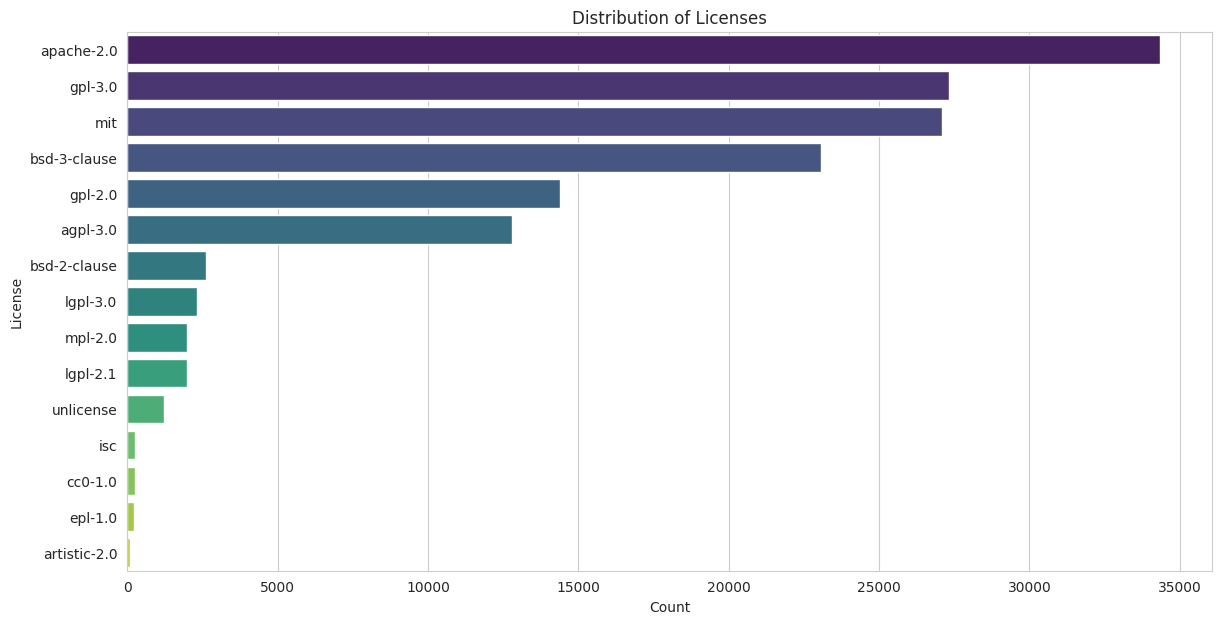

In [ ]:
# Plot the distribution of licenses
plt.figure(figsize=(14, 7))
sns.countplot(data=df, y='license', order=df['license'].value_counts().index, palette='viridis')
plt.title('Distribution of Licenses')
plt.xlabel('Count')
plt.ylabel('License')
plt.show()

/tmp/ipython-input-3491501601.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='autogenerated', palette='plasma')


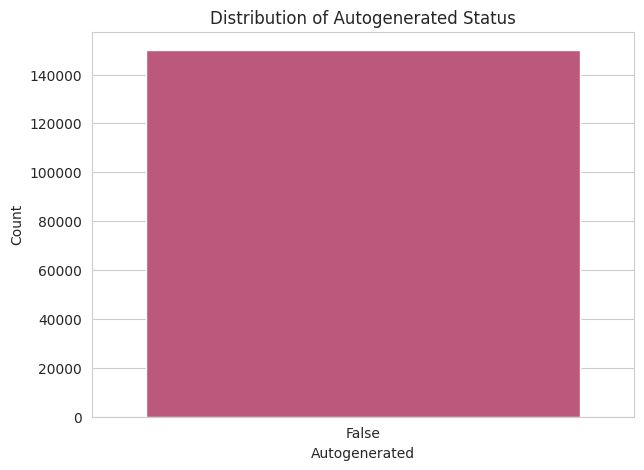

In [ ]:
# Plot the distribution of autogenerated status
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='autogenerated', palette='plasma')
plt.title('Distribution of Autogenerated Status')
plt.xlabel('Autogenerated')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-3400679705.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['repo_name'].isin(top_repos)], y='repo_name', order=top_repos, palette='magma')


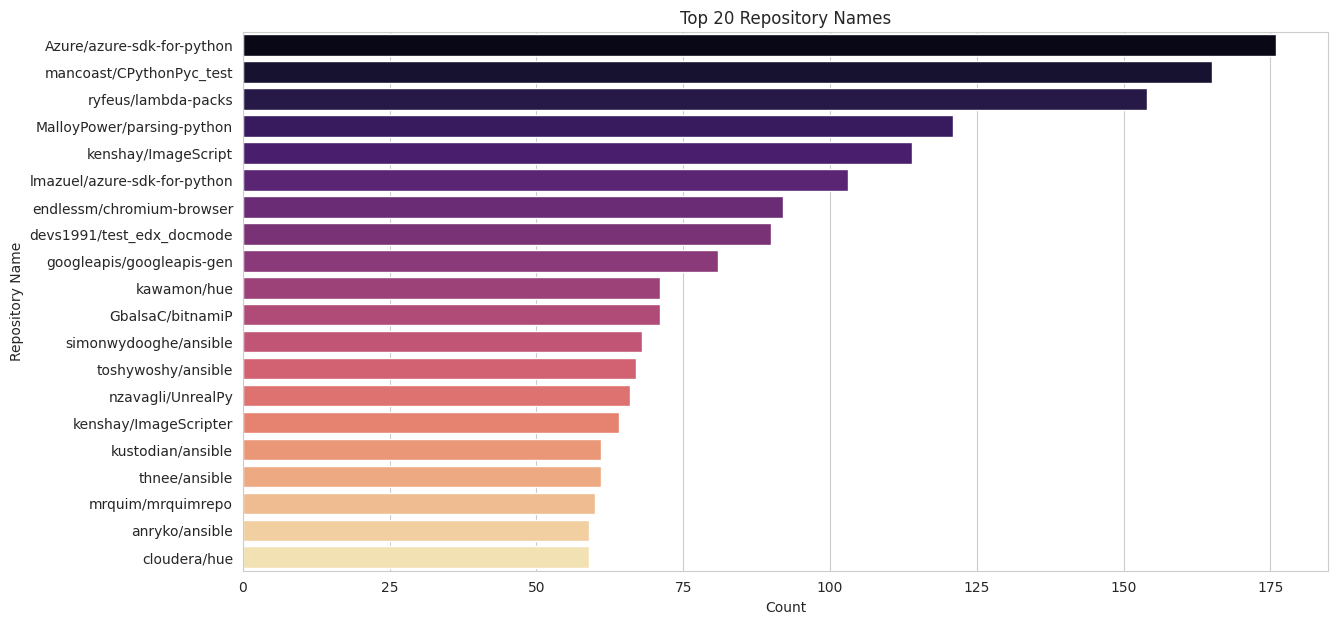

In [ ]:
# Plot the distribution of top repository names
plt.figure(figsize=(14, 7))
top_repos = df['repo_name'].value_counts().nlargest(20).index
sns.countplot(data=df[df['repo_name'].isin(top_repos)], y='repo_name', order=top_repos, palette='magma')
plt.title('Top 20 Repository Names')
plt.xlabel('Count')
plt.ylabel('Repository Name')
plt.show()

## 5. Exploring Relationships Between Features

Let's investigate how different features relate to each other.

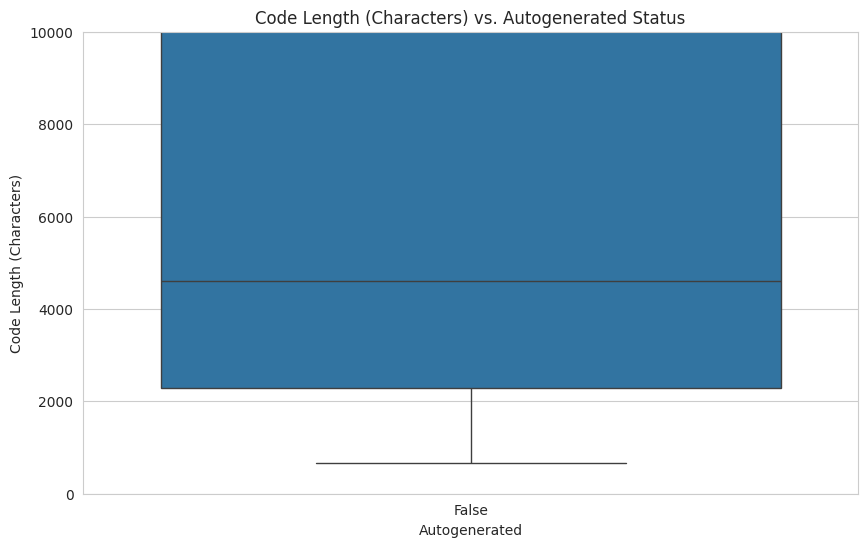

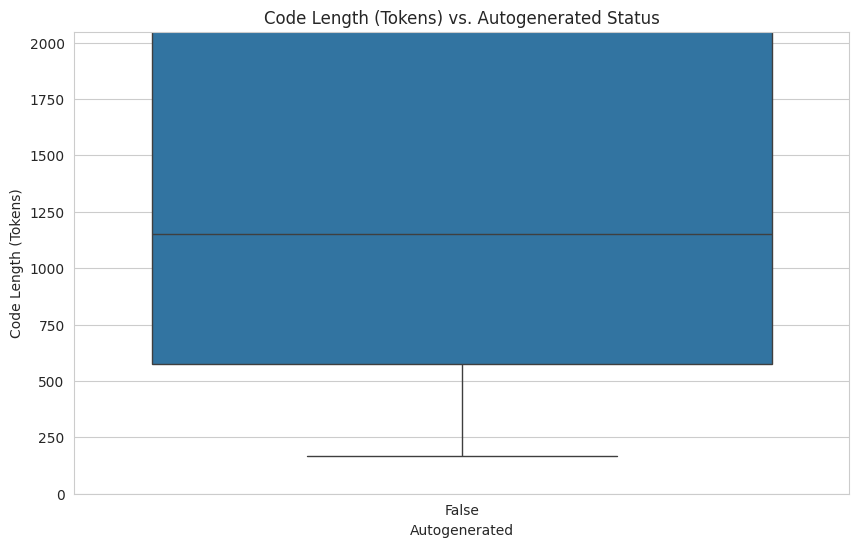

In [ ]:
# Relationship between code length (characters) and autogenerated status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='autogenerated', y='code_length_chars')
plt.title('Code Length (Characters) vs. Autogenerated Status')
plt.xlabel('Autogenerated')
plt.ylabel('Code Length (Characters)')
plt.ylim(0, 10000) # Limit y-axis for better visualization of the majority of data
plt.show()

# Relationship between code length (tokens) and autogenerated status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='autogenerated', y='code_length_tokens')
plt.title('Code Length (Tokens) vs. Autogenerated Status')
plt.xlabel('Autogenerated')
plt.ylabel('Code Length (Tokens)')
plt.ylim(0, 2048) # Limit y-axis for better visualization based on token distribution
plt.show()

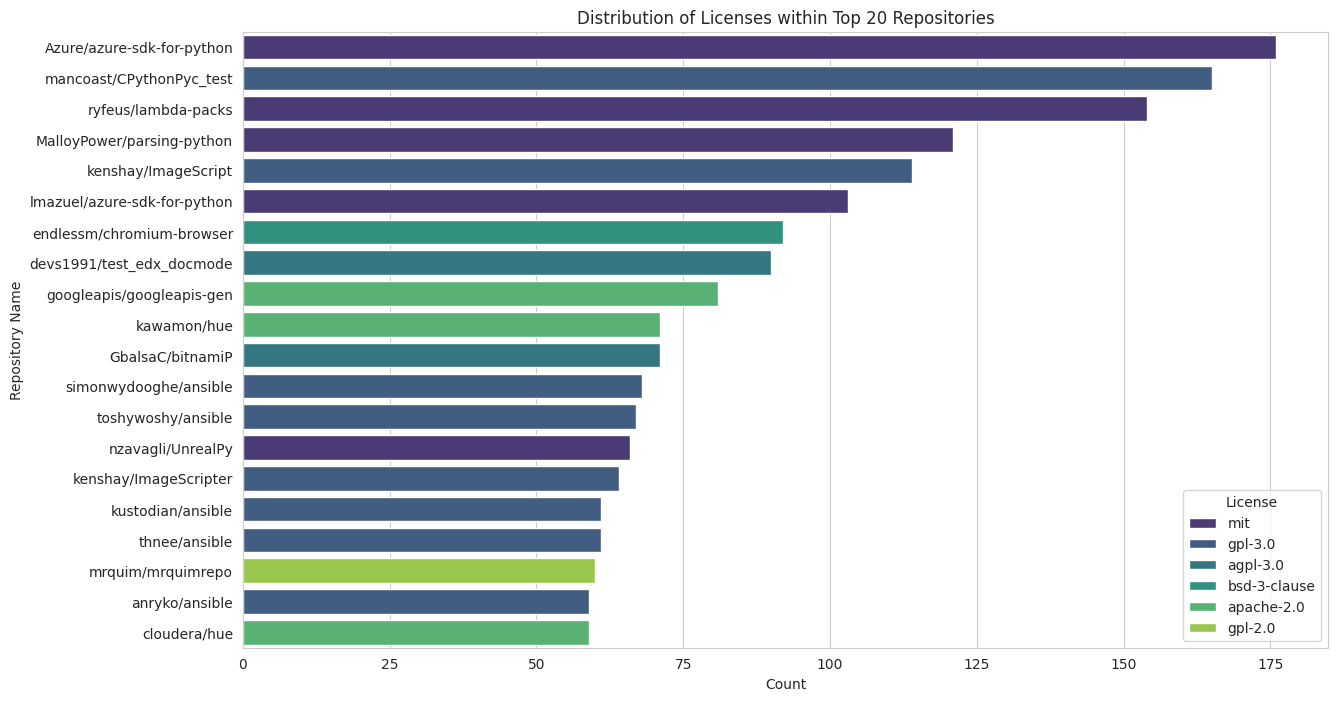

In [ ]:
# Distribution of licenses within the top 20 repositories
plt.figure(figsize=(14, 8))
sns.countplot(data=df[df['repo_name'].isin(top_repos)], y='repo_name', hue='license', order=top_repos, palette='viridis')
plt.title('Distribution of Licenses within Top 20 Repositories')
plt.xlabel('Count')
plt.ylabel('Repository Name')
plt.legend(title='License')
plt.show()

Tokenizing samples...
Done.

--- Data to be Plotted (describe) ---
count    150000.000000
mean       2563.190467
std        6067.955775
min         167.000000
25%         573.000000
50%        1151.000000
75%        2526.000000
max      393188.000000
Name: code_length_tokens, dtype: float64

--- Data to be Plotted (head) ---
0     442
1     617
2    2319
3    4283
4     891
Name: code_length_tokens, dtype: int64

Generating plot...


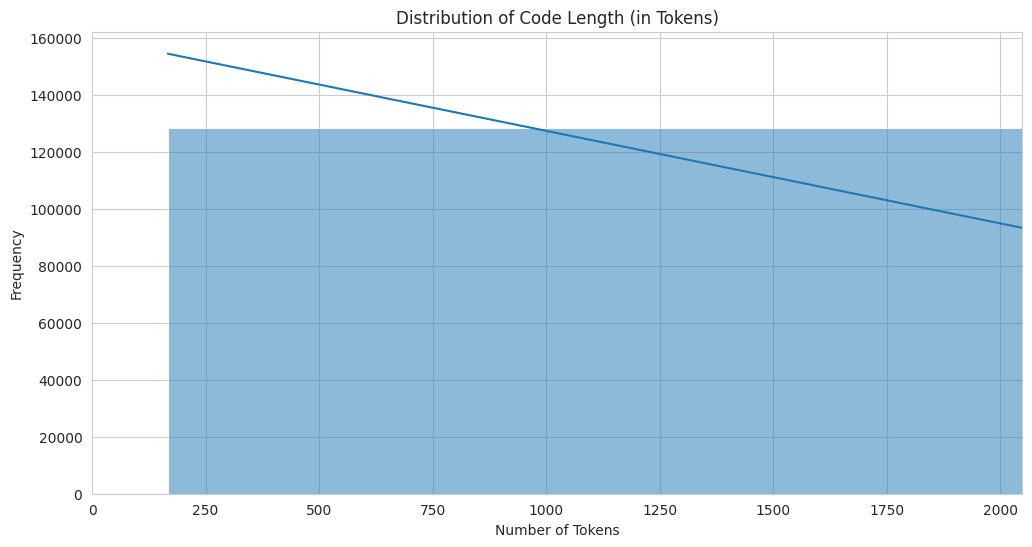

In [ ]:
tokenizer = Tokenizer.from_file(TOKENIZER_FILE)

# 2. Define the token counting function
def count_tokens(text):
    return len(tokenizer.encode(text).ids)

# 3. Apply the function to create the token length column
print("Tokenizing samples...")
df['code_length_tokens'] = df['content'].apply(count_tokens)
print("Done.")

# 4. (Diagnostic Step) Inspect the data before plotting
print("\n--- Data to be Plotted (describe) ---")
print(df['code_length_tokens'].describe())
print("\n--- Data to be Plotted (head) ---")
print(df['code_length_tokens'].head())

# 5. Create the plot
print("\nGenerating plot...")
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='code_length_tokens', bins=100, kde=True)
plt.title('Distribution of Code Length (in Tokens)')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.xlim(0, 2048)
plt.show()